# Sales Performance Analysis
### Wahington Motors

__A number of assumptions were made during the analyiss__ 

 _1. Cost of each model has remained the same from 2016_

 _2. The data provided was from Dec 2016 to till Nov 2019. In order to have full 12 months sale data from 2017 to 2019, Dec 19 sales were extrapolated by applying YTD November rtaio of 2018 and 2019 on Dec 2018 numbers_

 _3. As all leads are from new and distinct customers, customer id in the Purchase and Lead datasets identifies the same customer_

 _4. Customer age is assumed to be between 20 to 70 years during the cleaning of dob data_

 _5.Even though Al-Ain is part of Abu Dhabi Emirate, we treat it as separate Emirate for analysis purpose as it has significant sale volume_

 _6.We notice that the product value of particular customer in the Lea dataset is not the same as the product value in the Purchase dataset. So it is assumed that these customres initailly enquired about a model and ended up buying a different model_

In [861]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random

In [862]:
#loading the Purchase file into dataframe
DF_Leads = pd.read_csv(r"C:\CaseStudy\leads.csv")

In [863]:
#loading the Purchase file into dataframe
DF_Purchases  = pd.read_csv(r"C:\CaseStudy\purchases.csv") 

In [864]:
DF_Purchases.head()

,customer_id,bought_date,product,retail_price,discount
0,1,2016-12-01,Saturn,50000,1900.0
1,4,2016-12-01,Saturn,50000,4500.0
2,5,2016-12-01,Jupiter,80000,1300.0
3,6,2016-12-01,Pluto,40000,3800.0
4,8,2016-12-01,Pluto,40000,200.0


#### Lets run a general info on the Dataframe

In [865]:
DF_Purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 5 columns):
customer_id     12162 non-null int64
bought_date     12162 non-null object
product         12162 non-null object
retail_price    12162 non-null int64
discount        12162 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 475.2+ KB


In [866]:
DF_Purchases.describe()

,customer_id,retail_price,discount
count,12162.000000,12162.000000,12162.000000
mean,21118.978540,62735.569808,4893.504358
std,12100.696319,18590.421780,3831.388792
min,1.000000,40000.000000,0.000000
25%,10646.250000,50000.000000,2000.000000
50%,21586.000000,50000.000000,3900.000000
75%,31340.250000,80000.000000,6900.000000
max,42010.000000,90000.000000,18000.000000


The data set looks clean without any missing column values or extreme outliers. Before we furthere explore the data lets add cost column to the purchase data and calculate the profit on the sale

It is assued that the cost of each product remained the same from 2016

In [867]:
DF_Purchases_Clean =  DF_Purchases
DF_Purchases_Clean["cost"]=np.nan
DF_Purchases_Clean.loc[DF_Purchases_Clean['product'] == "Pluto", ['cost']] = 20000
DF_Purchases_Clean.loc[DF_Purchases_Clean['product'] == "Saturn", ['cost']] = 25000
DF_Purchases_Clean.loc[DF_Purchases['product'] == "Jupiter", ['cost']] = 40000
DF_Purchases_Clean["sale"] =DF_Purchases_Clean["retail_price"]-DF_Purchases_Clean["discount"]
DF_Purchases_Clean["profit"] =DF_Purchases_Clean["sale"]-DF_Purchases_Clean["cost"]

To help us analyze the data better, we now add a sale year and sale month column to the data

In [868]:
DF_Purchases_Clean["sale_year"] = pd.to_datetime(DF_Purchases_Clean.bought_date).dt.year
DF_Purchases_Clean["sale_month"] = pd.to_datetime(DF_Purchases_Clean.bought_date).dt.month
DF_Purchases_Clean["year_month"]= pd.to_datetime(DF_Purchases_Clean.bought_date).dt.strftime('%Y%m')

__Finally, we have the full purchase data set ready, or not yet...?__

In [869]:
DF_Purchases_Clean.head()

,customer_id,bought_date,product,retail_price,discount,cost,sale,profit,sale_year,sale_month,year_month
0,1,2016-12-01,Saturn,50000,1900.0,25000.0,48100.0,23100.0,2016,12,201612
1,4,2016-12-01,Saturn,50000,4500.0,25000.0,45500.0,20500.0,2016,12,201612
2,5,2016-12-01,Jupiter,80000,1300.0,40000.0,78700.0,38700.0,2016,12,201612
3,6,2016-12-01,Pluto,40000,3800.0,20000.0,36200.0,16200.0,2016,12,201612
4,8,2016-12-01,Pluto,40000,200.0,20000.0,39800.0,19800.0,2016,12,201612


_A quick look at the dat reveals that, we have data for sales from 2016 December to 2019 November.
In order to have full 12 months perriod comaprison over the years, we will remove Decemeber 2016 data and derive decemeber 2019 sales and profit  by applying based on YTD Nov ratio between 2018 and 2019 to Dec 18 figures_

In [870]:
DF_Purchases_Clean=DF_Purchases_Clean[DF_Purchases_Clean.sale_year>2016]

In [871]:
#calculate 2019 YTD Nov Sales and Profit
df_mtd_Nov19=DF_Purchases_Clean[(DF_Purchases_Clean.sale_year==2019)&(DF_Purchases_Clean.sale_month<=11)].groupby('product')['sale','profit'].sum()

In [872]:
#calculats 2018 YTD Nov Sales and Profit
df_mtd_Nov18=DF_Purchases_Clean[(DF_Purchases_Clean.sale_year==2018)&(DF_Purchases_Clean.sale_month<=11)].groupby('product')['sale','profit'].sum()

In [873]:
# calculate the Year over Year YTD Nov ratio between 2018 and 2019

MTD_Nov_YOY = df_mtd_Nov19.join (df_mtd_Nov18,lsuffix='_2019', rsuffix='_2018')
MTD_Nov_YOY["YOY_Sales_Ratio"]=MTD_Nov_YOY["sale_2019"]/MTD_Nov_YOY["sale_2018"]
MTD_Nov_YOY["YOY_Profit_Ratio"]=MTD_Nov_YOY["profit_2019"]/MTD_Nov_YOY["profit_2018"]
MTD_Nov_YOY

,sale_2019,profit_2019,sale_2018,profit_2018,YOY_Sales_Ratio,YOY_Profit_Ratio
product,,,,,,
Jupiter,92248300.0,46768300.0,120252100.0,53292100.0,0.767124,0.877584
Pluto,18053900.0,8013900.0,29032600.0,12892600.0,0.621849,0.621589
Saturn,35031100.0,15481100.0,60492600.0,26892600.0,0.579097,0.575664


In [874]:
# calculate December 2018 figure

df_Dec_2018=DF_Purchases_Clean[(DF_Purchases_Clean.sale_year==2018)&(DF_Purchases_Clean.sale_month==12)].groupby('product')['sale','profit'].sum()
df_Dec_2018

,sale,profit
product,,
Jupiter,14296400.0,6336400.0
Pluto,1294000.0,574000.0
Saturn,8559400.0,3784400.0


In [875]:
df_Dec_2018=df_Dec_2018.join(MTD_Nov_YOY[['YOY_Sales_Ratio','YOY_Profit_Ratio']])

In [876]:
#Apply the ratio to find out the Decmber 2019 figures
df_Dec_2018["sale"]=round(df_Dec_2018["sale"]*df_Dec_2018["YOY_Sales_Ratio"],0)
df_Dec_2018["profit"]=round(df_Dec_2018["profit"]*df_Dec_2018["YOY_Profit_Ratio"],0)
df_Dec_2019 =df_Dec_2018[["sale","profit"]].reset_index()
df_Dec_2019

,product,sale,profit
0,Jupiter,10967115.0,5560724.0
1,Pluto,804673.0,356792.0
2,Saturn,4956725.0,2178543.0


In [877]:
#Add sale year and month coluns in Dec 2019 aggregate for later calaulations

df_Dec_2019["sale_year"]=2019
df_Dec_2019["sale_month"]=12
df_Dec_2019

,product,sale,profit,sale_year,sale_month
0,Jupiter,10967115.0,5560724.0,2019,12
1,Pluto,804673.0,356792.0,2019,12
2,Saturn,4956725.0,2178543.0,2019,12


In [878]:
df_purchase_partial=DF_Purchases_Clean.groupby(['product','sale_year','sale_month'])['sale','profit'].sum().reset_index()
df_purchase_partial.head()

,product,sale_year,sale_month,sale,profit
0,Jupiter,2017,1,16369300.0,7769300.0
1,Jupiter,2017,2,8232900.0,3912900.0
2,Jupiter,2017,3,19394800.0,9194800.0
3,Jupiter,2017,4,13683000.0,6483000.0
4,Jupiter,2017,5,17731400.0,8411400.0


In [879]:
#Append the Dec 2020 data to the initial data

df_purchase_full_agg=pd.concat([df_purchase_partial,
          df_Dec_2019[['product','sale_year','sale_month','sale','profit']]],ignore_index=True)

#### Now we are ready with full 36 months data from Jan 2017 to Dec 2019 to carry out our analysis. 

In [880]:
df_purchase_full_agg.groupby('sale_year')['sale','profit'].sum()

,sale,profit
sale_year,,
2017,289040600.0,136985600.0
2018,233927100.0,103772100.0
2019,162061813.0,78359359.0


#### Lets first address "the elepahnt in the room", the continured drop of Sale and Profit over the last 3 years

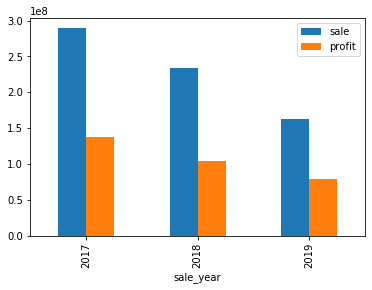

In [881]:
df_purchase_full_agg.groupby('sale_year')['sale','profit'].sum().plot(kind='bar')

In [882]:
df_purchase_full_agg.groupby(['sale_year'])['sale'].sum().reset_index()

,sale_year,sale
0,2017,289040600.0
1,2018,233927100.0
2,2019,162061813.0


__As seen, Sale and consequently Profit has seen a continued drop from 2017 to 2019__

__There was a drop in sale of 24% from 2017 to and a further drop of 43% from 2018 to 2019__

Lets now look at how what was the impact of the drop on the sale of the three models

In [883]:
df_product_sale=df_purchase_full_agg.groupby(['product','sale_year'])['sale'].sum().reset_index().pivot( index='product',columns='sale_year', values='sale').reset_index()
df_product_sale.columns=['product', '2017', '2018', '2019']
df_product_sale['Var_2018_2017']=round(df_product_sale['2018']/df_product_sale['2017']-1,4)*100
df_product_sale['Var_2019_2018']=round(df_product_sale['2019']/df_product_sale['2018']-1,4)*100
df_product_sale

,product,2017,2018,2019,Var_2018_2017,Var_2019_2018
0,Jupiter,184055100.0,134548500.0,103215415.0,-26.90,-23.29
1,Pluto,42072200.0,30326600.0,18858573.0,-27.92,-37.82
2,Saturn,62913300.0,69052000.0,39987825.0,9.76,-42.09


__Sale of all models has seen drop over the last 36 months with the exception of Saturn which showed some resilience in 2018__

__Saturn's sale holding in 2018 can be because if the promotion measures undertaken from 2018. We will analyze if this is the case later__

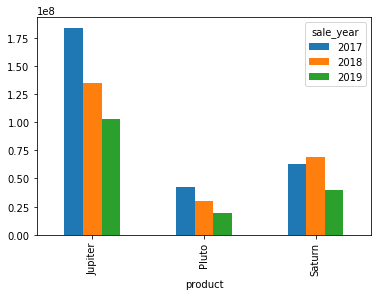

In [884]:
df_purchase_full_agg.groupby(['product','sale_year'])['sale'].sum().reset_index().pivot( index='product',columns='sale_year', values='sale').plot(kind='bar')

_As seen, Jupiter contributes a big chunk of the revenue and the hit has taken in 2018 and 2019 has wornsened the already bad sale progreson_

Let us now look how sale has progressed throug Jan to Dec for eah year since 2017

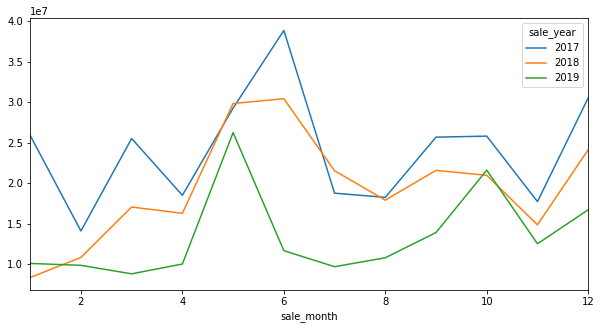

In [885]:
df_purchase_full_agg.groupby(['sale_year','sale_month'])['sale'].sum().reset_index().pivot( index='sale_month',columns='sale_year', values='sale').plot(figsize=(10,5))

__So fare we have seen that__

__1. There is a continued drop of Sale and Profit from 2017 to 2019__

__2. The drop is across all models and months compared to the previous years__

__This is most likely due to a combination unfavorable market conditions and competition__

We end the exploratory data anlaysis on Purchase data set by having a look at the percenatge contribution of the three models on Sale, Profit and Units Sold

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76AFF6F98>,
      dtype=object)

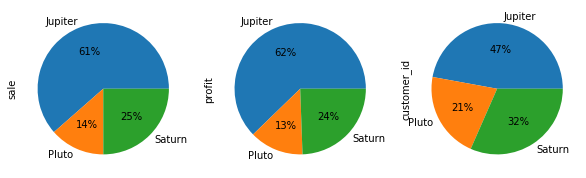

In [886]:
DF_Purchases_Clean.groupby(["product"]).agg({'sale':'sum','profit':'sum','customer_id':'count'}).plot(kind='pie',subplots=True,autopct='%1.0f%%',legend=False,figsize=(10,10))

_As seen, Jupiter is the most selling model with over 60% of contribution to both Sale and Profit_

__With understandings gained from the Purchase data analysis, we turn our attention to the Lead dataset__

__First let us gathere some genearl idea about the columns and data__

In [887]:
DF_Leads.head(10)

,customer_id,lead_date,product,gender,nationality,emirate,salary,dob
0,1,2016-12-01,Saturn,Male,India,Dubai,0.0,1982-03-31
1,2,2016-12-01,Pluto,Male,U.A.E.,Sharjah,0.0,1967-05-19
2,3,2016-12-01,Pluto,Male,Pakistan,Sharjah,0.0,1958-11-08
3,4,2016-12-01,Saturn,Male,India,Dubai,9781.0,1970-07-16
4,5,2016-12-01,Jupiter,Female,U.A.E.,Fujairah,18430.0,1984-10-05
5,6,2016-12-01,Pluto,Male,Sri Lanka,Abu Dhabi,4820.0,1989-02-16
6,7,2016-12-01,Saturn,Male,India,Dubai,18714.0,1973-06-03
7,8,2016-12-01,Pluto,Female,Algeria,Dubai,8350.0,1985-01-14
8,9,2016-12-01,Saturn,Male,India,Dubai,7613.0,1985-12-19
9,10,2016-12-01,Jupiter,Male,Sudan,Dubai,35105.0,1967-07-07


In [888]:
DF_Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42010 entries, 0 to 42009
Data columns (total 8 columns):
customer_id    42010 non-null int64
lead_date      42010 non-null object
product        42010 non-null object
gender         41932 non-null object
nationality    41932 non-null object
emirate        39521 non-null object
salary         42010 non-null float64
dob            37154 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 2.6+ MB


In [889]:
DF_Leads.describe()

,customer_id,salary
count,42010.000000,4.201000e+04
mean,21005.500000,1.327542e+04
std,12127.386741,3.902116e+05
min,1.000000,0.000000e+00
25%,10503.250000,0.000000e+00
50%,21005.500000,0.000000e+00
75%,31507.750000,1.454875e+04
max,42010.000000,7.648655e+07


__We observe a lot of issues here , with so many columns missing values or having extreme outlier values. We will look at the fileds one by one and do an exploratory data analysis and clean the data__

## Exploratory Data Analysis

In [890]:
#first copy the data to a new dataframe to expore and clean
DF_Leads_Clean = DF_Leads

First let us look at the dob column. We are more interested in deriving the age of the customer from this column rather than using the actual dates. So, first lets create dob year column from this and drop the dob column

In [891]:
DF_Leads_Clean["dob_year"] = pd.to_datetime(DF_Leads_Clean.dob).dt.year

In [892]:
DF_Leads_Clean.drop (['dob'],axis=1,inplace=True)

### Now, let us look at the number of missing value and its percenatge for each column

In [893]:
total = DF_Leads_Clean.isnull().sum().sort_values(ascending=False)
percent_1 = DF_Leads_Clean.isnull().sum()/DF_Leads_Clean.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
dob_year,4856,11.6
emirate,2489,5.9
nationality,78,0.2
gender,78,0.2
salary,0,0.0


#### 1. DOB_YEAR

__We run a quick stats on the column and see the its distribution using a histogram__

In [894]:
DF_Leads_Clean.dob_year.describe()

count    37154.000000
mean      1977.868036
std         11.599738
min       1899.000000
25%       1972.000000
50%       1980.000000
75%       1986.000000
max       2019.000000
Name: dob_year, dtype: float64

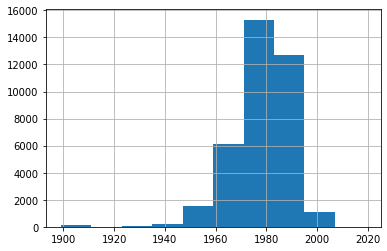

In [895]:
DF_Leads_Clean.dob_year.hist()

__First we assume that the customer are between 20 to 70 years old, which is very resonable looking at the histogram as ouliers look like bada data. We bring the dob year in range first__

In [896]:
DF_Leads_Clean.loc[DF_Leads_Clean['dob_year'] > 2000, ['dob_year']] = 2000
DF_Leads_Clean.loc[DF_Leads_Clean['dob_year'] < 1950, ['dob_year']] = 1950

__We are still left with the missing values in the dob year column__

__To fill, twe create a list of random years around the medain year of 1980__

__The length of this list is equal to the number of missing vallues and this is used to fill the missing values__

In [897]:
is_null = DF_Leads_Clean['dob_year'].isnull().sum()
# compute random numbers between around the median year
rand_year = np.random.randint(1970, 1990, size = is_null)
# fill NaN values in dob_year column with random values generated
year_slice = DF_Leads_Clean['dob_year'].copy()
year_slice[np.isnan(year_slice)] = rand_year

In [898]:
DF_Leads_Clean['dob_year']=year_slice
DF_Leads_Clean['dob_year'].isnull().sum()

0

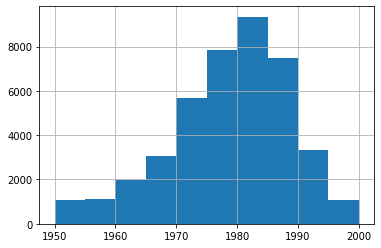

In [899]:
DF_Leads_Clean.dob_year.hist()

### 2. Emirate

DF_Leads_Clean.emirate.value_counts()

__First, sale in Khorfakan is assigned to its Emiarte Sharjah, one rare entry of Muscat is assigned to Dubai__

In [900]:
DF_Leads_Clean.loc[DF_Leads_Clean['emirate'] == "Khorfakan", ['emirate']] = 'Sharjah'
DF_Leads_Clean.loc[DF_Leads_Clean['emirate'] == "Muscat", ['emirate']] = 'Dubai'

_Even though Al-Ain is part of Abu Dhabi Emirate, we treat it as separate Emirate for analysis as it has significant sale volume_

__The missing values are filled by randomly drawing a sample, length of which is equal to the number of missing values, from the non nulls values in the emirates column. This makes sure that the a similar distribution of the non null values is maintained in the drawn sample__

In [901]:
full_list = DF_Leads_Clean[DF_Leads_Clean.emirate.notnull()].emirate.to_list()
em_null = DF_Leads_Clean['emirate'].isnull().sum()

sampled_list = random.sample(full_list, em_null)
DF_Leads_Clean.loc[DF_Leads_Clean['emirate'].isnull(),['emirate']]=sampled_list

In [902]:
DF_Leads_Clean.emirate.isnull().sum()

0

### 3. Nationality

In [903]:
DF_Leads_Clean.nationality.value_counts()

U.A.E.                15909
India                  9476
Egypt                  2917
Pakistan               2070
Not Known              1765
Jordan                 1047
Sudan                   843
Syria                   768
Philippines             763
United Kingdom          569
Iran                    383
Palestinian             382
Yemen                   372
Lebanon                 365
Iraq                    317
China                   235
USA                     199
Oman                    190
Comoro                  190
Canada                  184
Bangladesh              181
Sri Lanka               156
South Africa            137
Afghanistan             115
France                  111
Morocco                 107
Russian Fed.             94
Ethiopia                 84
Tunisia                  73
Somalia                  71
                      ...  
Marianian                 1
Mongolia                  1
Samoan                    1
Madagascar                1
Montserrat          

In [904]:
DF_Leads_Clean.nationality.describe()

count      41932
unique       178
top       U.A.E.
freq       15909
Name: nationality, dtype: object

__We have only 2% of the values as null in the nationality column. But there are a lot of "Not Known" values in the column. To replace these vlaues together, we folow a simlar approach as we used for emirate column__

In [905]:
full_not_null = DF_Leads_Clean[(DF_Leads_Clean.nationality.notnull()) & (DF_Leads_Clean.nationality !='Not Known')].nationality.to_list()
nat_null = DF_Leads_Clean[(DF_Leads_Clean.nationality.isnull())| (DF_Leads_Clean.nationality=='Not Known')].customer_id.count()
nat_sampled_list = random.sample(full_not_null, nat_null)
DF_Leads_Clean.loc[(DF_Leads_Clean.nationality.isnull())| (DF_Leads_Clean.nationality=='Not Known'),['nationality']]=nat_sampled_list

### 4. Gender

__We have only 2% of the values as null in the nationality column. We replace this with the most common value "Male"__

In [906]:
DF_Leads_Clean.gender.value_counts()

Male      34913
Female     7019
Name: gender, dtype: int64

In [907]:
DF_Leads_Clean.gender.fillna("Male",inplace=True)

### 5. Salary

__On the first look, salary column had no missing values. However, a closer look revels that the value is zero wherever the data is not vailable. Around 60% of the values are zero, we will emply a combination of two methods two replace these__

In [908]:
DF_Leads_Clean.salary.describe()

count    4.201000e+04
mean     1.327542e+04
std      3.902116e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.454875e+04
max      7.648655e+07
Name: salary, dtype: float64

In [909]:
DF_Leads_Clean[DF_Leads_Clean.salary==0].salary.value_counts()

0.0    26097
Name: salary, dtype: int64

In [340]:
DF_Leads_Clean[DF_Leads_Clean.salary>0].salary.describe()

count    1.591300e+04
mean     3.504683e+04
std      6.334267e+05
min      2.000000e+00
25%      1.143700e+04
50%      2.001000e+04
75%      3.048200e+04
max      7.648655e+07
Name: salary, dtype: float64

__Salary column has extreme outlier values ranging to millions, some of these figures look like annual salary number. First we will bring the higher values in range by lowering any salary which is 2.5 times the inter quartile range over the 75th percentile__

In [843]:
u_q= DF_Leads_Clean[DF_Leads_Clean.salary>0].salary.quantile(0.75)
l_q= DF_Leads_Clean[DF_Leads_Clean.salary>0].salary.quantile(0.25)
iqr = u_q - l_q
sal_ceiling=u_q + 2.5*iqr
sal_ceiling

78094.5

In [910]:
DF_Leads_Clean.loc[DF_Leads_Clean['salary'] > sal_ceiling, ['salary']] = u_q +2*iqr

In [911]:
DF_Leads_Clean.loc[DF_Leads_Clean['salary'] == 2, ['salary']] = 20000

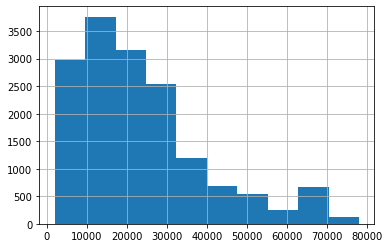

In [912]:
DF_Leads_Clean[DF_Leads_Clean.salary>0].salary.hist()

__Secondly, we will use a similar approach like the one we used for dob year. Here we use random salry values between 25th percentile and 75th percentile to fill the zero values__

In [913]:
sal_zero = DF_Leads_Clean[DF_Leads_Clean.salary==0].salary.count()
# compute random numbers between around the median year
rand_sal = np.random.randint(l_q, u_q, size = sal_zero)
# fill NaN values in dob_year column with random values generated
sal_slice = DF_Leads_Clean['salary'].copy()
DF_Leads_Clean.loc[DF_Leads_Clean['salary']==0,['salary']]=rand_sal

Finally we will inspect the datframe again for any missing values.

In [914]:
DF_Leads_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42010 entries, 0 to 42009
Data columns (total 8 columns):
customer_id    42010 non-null int64
lead_date      42010 non-null object
product        42010 non-null object
gender         42010 non-null object
nationality    42010 non-null object
emirate        42010 non-null object
salary         42010 non-null float64
dob_year       42010 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.6+ MB


Now, to prepare the final full Purchade data set we add a derived columns

In [915]:
DF_Leads_Clean["lead_year"] = pd.to_datetime(DF_Leads_Clean.lead_date).dt.year
DF_Leads_Clean["lead_month"] = pd.to_datetime(DF_Leads_Clean.lead_date).dt.month

In [916]:
DF_Leads_Clean["age"] =  datetime.now().year - DF_Leads_Clean["dob_year"].astype(int)

In [917]:
DF_Leads_Clean.drop (['dob_year'],axis=1,inplace=True)

In [918]:
DF_Leads_Clean.head()

,customer_id,lead_date,product,gender,nationality,emirate,salary,lead_year,lead_month,age
0,1,2016-12-01,Saturn,Male,India,Dubai,24516.0,2016,12,38
1,2,2016-12-01,Pluto,Male,U.A.E.,Sharjah,25299.0,2016,12,53
2,3,2016-12-01,Pluto,Male,Pakistan,Sharjah,12351.0,2016,12,62
3,4,2016-12-01,Saturn,Male,India,Dubai,9781.0,2016,12,50
4,5,2016-12-01,Jupiter,Female,U.A.E.,Fujairah,18430.0,2016,12,36


## Data Anlaysis on the Customer Demography

In [919]:
# Combine the Purchase and Lead dataframes

DF_Purchase_Full=DF_Leads_Clean.merge(DF_Purchases_Clean[['customer_id','product','sale','profit','sale_year','sale_month','year_month']],how='inner',on='customer_id', suffixes=('_lead', '_purchase'))

In [920]:
DF_Purchase_Full.head()

,customer_id,lead_date,product_lead,gender,nationality,emirate,salary,lead_year,lead_month,age,product_purchase,sale,profit,sale_year,sale_month,year_month
0,1850,2017-01-02,Pluto,Male,Pakistan,Dubai,15539.0,2017,1,27,Pluto,36700.0,16700.0,2017,1,201701
1,1853,2017-01-02,Jupiter,Male,U.A.E.,Abu Dhabi,24580.0,2017,1,45,Jupiter,77000.0,37000.0,2017,1,201701
2,1855,2017-01-02,Saturn,Male,India,Dubai,14458.0,2017,1,44,Saturn,47000.0,22000.0,2017,1,201701
3,1857,2017-01-02,Saturn,Male,Egypt,Sharjah,5813.0,2017,1,46,Saturn,46400.0,21400.0,2017,1,201701
4,1870,2017-01-02,Saturn,Female,U.A.E.,Sharjah,8549.0,2017,1,43,Saturn,47900.0,22900.0,2017,1,201701


Lets first look at the contribution of sale by each emirate

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76B805A20>],
      dtype=object)

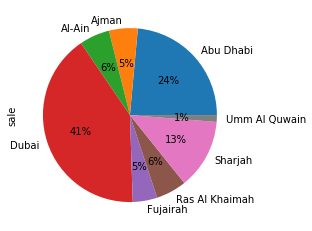

In [921]:
DF_Purchase_Full.groupby(['emirate'])['sale'].sum().to_frame().plot(kind='pie',subplots=True,autopct='%1.0f%%',legend=False)

__As seen, Abhu Dhabi and Dubai Contributes to almost 65% percentage of the sale__

__Lets also look at how the sales in the emiartes have dropped over the last 36 months__

In [923]:
df_emirate_sale=DF_Purchase_Full.groupby(['emirate','sale_year'])['sale'].sum().reset_index().pivot( index='emirate',columns='sale_year', values='sale').reset_index()
df_emirate_sale.columns=['emirate',  '2017', '2018', '2019']
df_emirate_sale['Var_2018_2017']=round(df_emirate_sale['2018']/df_emirate_sale['2017']-1,4)*100
df_emirate_sale['Var_2019_2018']=round(df_emirate_sale['2019']/df_emirate_sale['2018']-1,4)*100
df_emirate_sale
#df_emirate_sale['2018']

,emirate,2017,2018,2019,Var_2018_2017,Var_2019_2018
0,Abu Dhabi,68531100.0,55563400.0,33228700.0,-18.92,-40.20
1,Ajman,13608800.0,13909500.0,8218600.0,2.21,-40.91
2,Al-Ain,16372700.0,13753300.0,7489300.0,-16.00,-45.55
3,Dubai,114425200.0,93364500.0,66264600.0,-18.41,-29.03
4,Fujairah,15200000.0,10319500.0,4823100.0,-32.11,-53.26
5,Ras Al Khaimah,18528100.0,13003500.0,6478700.0,-29.82,-50.18
6,Sharjah,39611100.0,30425200.0,16758200.0,-23.19,-44.92
7,Umm Al Quwain,2763600.0,3588200.0,2072100.0,29.84,-42.25


__One interesting find is that, the samller emiartes have seen bigger drop in sale comapred to the major Emirates like Dubai and Abu Dhabi__

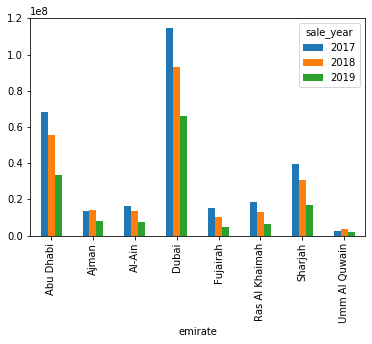

In [924]:
DF_Purchase_Full.groupby(['emirate','sale_year'])['sale'].sum().reset_index().pivot( index='emirate',columns='sale_year', values='sale').plot(kind ='bar')

__Now look at Nationality__

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76B3B4FD0>],
      dtype=object)

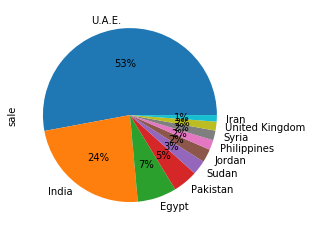

In [925]:
DF_Purchase_Full.groupby(['nationality'])['sale'].sum().to_frame().sort_values('sale',ascending=False).iloc[:10].plot(kind='pie',subplots=True,autopct='%1.0f%%',legend=False)

__U.A.E and Indian nationals account for 75% of the sale__

__To analyze the age demography, we first create age group and look at the distribution__

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76B422A58>],
      dtype=object)

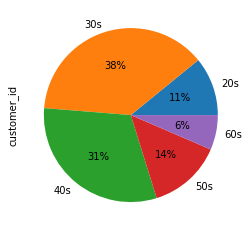

In [926]:
bins = [0,30, 40, 50, 60,70]
labels =['20s', '30s', '40s', '50s', '60s']
DF_Purchase_Full.groupby(pd.cut(DF_Purchase_Full['age'], bins,labels=labels))['customer_id'].count().plot(kind='pie',subplots=True,autopct='%1.0f%%',legend=False)

__50%  of all customers are under 40 years of age__

__Now we look at the preference for each model among the different age group__

In [927]:
bins = [0,30, 40, 50, 60,70]
labels =['20s', '30s', '40s', '50s', '60s']
DF_Purchase_Full.groupby([pd.cut(DF_Purchase_Full['age'], bins,labels=labels),'product_lead'])['customer_id'].count().reset_index().pivot( index='age',columns='product_lead', values='customer_id')

product_lead,Jupiter,Pluto,Saturn
age,,,
20s,612,332,311
30s,1679,1237,1444
40s,1641,799,1141
50s,796,308,477
60s,371,139,236


__The luxury SUV, Jupiter, is preferred mostly by customers in their 30s and 40s__

__We follow a similar approach for customers in different salary buckets__

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76BA49BE0>],
      dtype=object)

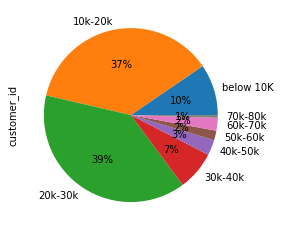

In [928]:
bins = [0,10000, 20000, 30000, 40000,50000,60000,70000,80000]
labels =['below 10K', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k']
DF_Purchase_Full.groupby(pd.cut(DF_Purchase_Full['salary'], bins,labels=labels))['customer_id'].count().plot(kind='pie',subplots=True,autopct='%1.0f%%',legend=False)

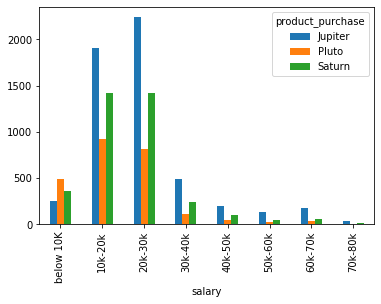

In [929]:
bins = [0,10000, 20000, 30000, 40000,50000,60000,70000,80000]
labels =['below 10K', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k']
DF_Purchase_Full.groupby([pd.cut(DF_Purchase_Full['salary'], bins,labels=labels),'product_purchase'])['customer_id'].count().reset_index().pivot( index='salary',columns='product_purchase', values='customer_id').plot(kind ='bar')

## Impact of Promotions

__Two initiatives were trialed two comabt the drop in sales__

__From January 2018, the brand decided to up the maximum potential discounts from 10% to 20%__

__From January 2019, the brand decided to increase the price of the Jupiter from 80,000 to 90,000__


First let us look the impact of increased maximum discount. We see that the avearge discount has indeed increased from 2018

In [930]:
DF_Purchases_Clean.groupby('sale_year')['discount'].mean().to_frame()

,discount
sale_year,
2017,3106.452278
2018,6206.280875
2019,6681.825692


_To meassure the impact of discount, first we look at the average selling price across years. We should look at the average price as the number of units sold are not the same in each year_

In [931]:
DF_Purchases_Clean.groupby('sale_year')['sale'].mean().to_frame()

,sale
sale_year,
2017,59583.714698
2018,55028.722653
2019,60030.276745


__An intersting find here is that, the discount seemed to have lowered the avearge priced in 2018, but not in 2019. This appears to be because of the increase in price of top sellig model Jupiter in 2019__

__Let's dig deeper and see if this is the case__

In [932]:
DF_Purchase_Full.groupby(['product_purchase','sale_year'])['sale'].mean().round(0).reset_index().pivot( index='product_purchase',columns='sale_year', values='sale')

sale_year,2017,2018,2019
product_purchase,,,
Jupiter,76024.0,71836.0,81133.0
Pluto,38006.0,35975.0,35964.0
Saturn,47554.0,44985.0,44797.0


__Our guess was right !!__

__Even after discount, Jupite was selling over pre 2019 undiscounted price and at much higher than 2018 discounted price__

__Price increase has nullified any effect discoount had on sale for Jupiter__

__The second metric we use to meassure the impact of discount is to check if more people who came enquiring for a lower priced model has endde up buying a higher price model in 2018 compared to 2017__

__We notice that the product value of particular customer in the Lea dataset is not the same as the product value in the Purchase dataset. So we assume that these customres initailly enquired about a model and ended up buying a different model__

__One of the reasons for this can be assumed to be the increased discount in 2018__

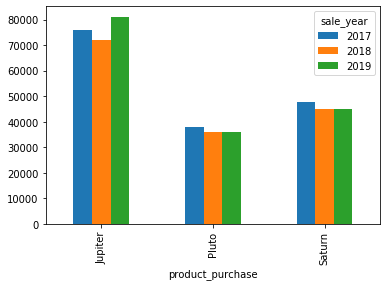

In [933]:
DF_Purchase_Full.groupby(['product_purchase','sale_year'])['sale'].mean().reset_index().pivot( index='product_purchase',columns='sale_year', values='sale').plot(kind ='bar')

In [934]:
DF_Purchase_Full.groupby(['product_purchase','sale_year'])['customer_id'].count().reset_index().pivot( index='product_purchase',columns='sale_year', values='customer_id')

sale_year,2017,2018,2019
product_purchase,,,
Jupiter,2421,1873,1137
Pluto,1107,843,502
Saturn,1323,1535,782


In [632]:
DF_Purchase_Upsell= DF_Purchase_Full[((DF_Purchase_Full['product_lead']=="Pluto") & (DF_Purchase_Full['product_purchase']=="Saturn"))|((DF_Purchase_Full['product_lead']=="Pluto") & (DF_Purchase_Full['product_purchase']=="Jupiter")|((DF_Purchase_Full['product_lead']=="Saturn") & (DF_Purchase_Full['product_purchase']=="Jupiter")))]
DF_Purchase_Upsell.customer_id.count()

2228

In [935]:
DF_Purchase_Upsell.groupby(['product_purchase','sale_year'])['customer_id'].count().reset_index().pivot( index='product_purchase',columns='sale_year', values='customer_id')

sale_year,2018,2019
product_purchase,,
Jupiter,1031,659
Saturn,347,191


__We notice that the upsell to higher model has indeed happended post 2017__

_The last metric we anlyze is the conversion rate change of an enquiry into sale after 2017_

In [936]:
DF_Lead_Conversion=DF_Leads_Clean.merge(DF_Purchases_Clean[['customer_id','product','sale','profit','sale_year','sale_month','year_month']],how='left',on='customer_id', suffixes=('_lead', '_purchase'))

In [937]:
DF_Lead_Conversion.head()

,customer_id,lead_date,product_lead,gender,nationality,emirate,salary,lead_year,lead_month,age,product_purchase,sale,profit,sale_year,sale_month,year_month
0,1,2016-12-01,Saturn,Male,India,Dubai,24516.0,2016,12,38,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016-12-01,Pluto,Male,U.A.E.,Sharjah,25299.0,2016,12,53,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016-12-01,Pluto,Male,Pakistan,Sharjah,12351.0,2016,12,62,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2016-12-01,Saturn,Male,India,Dubai,9781.0,2016,12,50,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016-12-01,Jupiter,Female,U.A.E.,Fujairah,18430.0,2016,12,36,NaN,NaN,NaN,NaN,NaN,NaN


In [938]:
DF_Lead_Conversion.groupby(['product_lead','lead_year']).agg({'customer_id':'count','product_purchase':'count'}) .reset_index().pivot( index='product_lead',columns='lead_year', values=['customer_id','product_purchase']).reset_index()

product_lead customer_id                   product_purchase        \
lead_year                     2016  2017  2018  2019             2016  2017   
0              Jupiter         732  8350  5886  3326                0  2421   
1                Pluto         688  4774  3518  2227                0  1107   
2               Saturn         428  4297  4669  3115                0  1323   

                      
lead_year  2018 2019  
0          1725  953  
1          1084  624  
2          1442  844

__We see that the conversion rate has remained more or less the same over the last 36 months__

### Impact of the Price increase of Jupiter in Jan 2019

_We ahve already observed that_

_Even after discount, Jupite was selling over pre 2019 undiscounted price and at much higher than 2018 discounted price_

__In the hind sight, this appears to be a bad move as this has driven the avearge selling price of Jupiter up on an already bad market. The aim shoud have been to drive the revenue through volume than price__